<a href="https://colab.research.google.com/github/nitrohelix1/jupyter-exploration/blob/main/Improved_Object_Detection_with_Faster_R_CNN_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load VOC2007 dataset
def load_data():
    dataset = torchvision.datasets.VOCDetection(root='data', year='2007', image_set='train', download=True)
    return dataset

# Plotting function (your original implementation)
def plot_img_with_boxes(img, predictions, threshold=0.5):
    plt.figure(figsize=(12,8))
    plt.imshow(img.permute(1, 2, 0))
    ax = plt.gca()
    boxes = predictions['boxes'].cpu().numpy()
    scores = predictions['scores'].cpu().numpy()
    for box, score in zip(boxes, scores):
        if score > threshold:
            xmin, ymin, xmax, ymax = box
            rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, color='red')
            ax.add_patch(rect)
    plt.show()




In [2]:
! pip install kaggle


In [3]:
! kaggle datasets download -d zaraks/pascal-voc-2007

Dataset URL: https://www.kaggle.com/datasets/zaraks/pascal-voc-2007
License(s): other
100% 1.65G/1.65G [01:39<00:00, 20.8MB/s]
100% 1.65G/1.65G [01:39<00:00, 17.8MB/s]


In [4]:
! unzip pascal-voc-2007.zip

Streaming output truncated to the last 5000 lines.
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001729.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001730.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001732.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001733.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001734.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001738.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001739.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001741.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001746.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001747.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001749.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001750.jpg  
 

In [5]:
# Load VOC2007 dataset
def load_data():
    dataset = torchvision.datasets.VOCDetection(root='data', year='2007', image_set='train', download=True)
    return dataset

# Plotting function (your original implementation)
def plot_img_with_boxes(img, predictions, threshold=0.5):
    plt.figure(figsize=(12,8))
    plt.imshow(img.permute(1, 2, 0))
    ax = plt.gca()
    boxes = predictions['boxes'].cpu().numpy()
    scores = predictions['scores'].cpu().numpy()
    for box, score in zip(boxes, scores):
        if score > threshold:
            xmin, ymin, xmax, ymax = box
            rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, color='red')
            ax.add_patch(rect)
    plt.show()

In [6]:
# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# New function for inference
def perform_inference(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        predictions = model(image_tensor)

    return image_tensor[0], predictions[0]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 173MB/s]


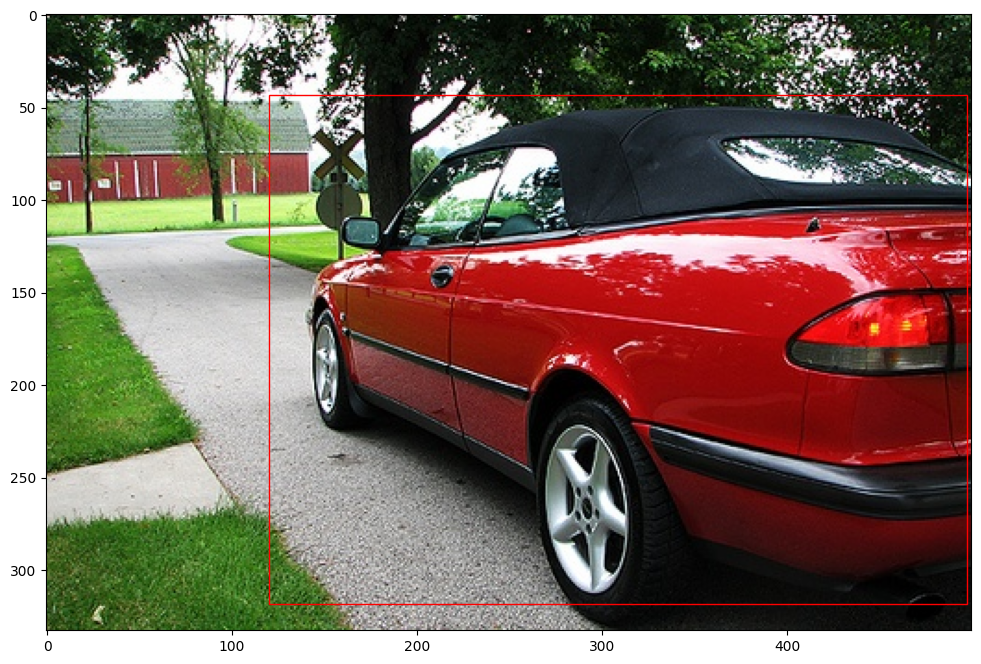

Detected car with confidence 0.89


In [10]:
# Example usage
image_path = 'VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000007.jpg'  # Replace with an actual image path
image, predictions = perform_inference(image_path)
plot_img_with_boxes(image, predictions)

# Print detected objects
VOC_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

for label, score in zip(predictions['labels'], predictions['scores']):
    if score > 0.5:
        print(f"Detected {VOC_INSTANCE_CATEGORY_NAMES[label]} with confidence {score:.2f}")

In [9]:
def plot_img_with_boxes(img, predictions, threshold=0.5):
    plt.figure(figsize=(12,8))
    # Move the image tensor to CPU before plotting
    plt.imshow(img.cpu().permute(1, 2, 0))
    ax = plt.gca()
    boxes = predictions['boxes'].cpu().numpy()
    scores = predictions['scores'].cpu().numpy()
    for box, score in zip(boxes, scores):
        if score > threshold:
            xmin, ymin, xmax, ymax = box
            rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, color='red')
            ax.add_patch(rect)
    plt.show()